In [24]:
import pandas as pd
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
from pypfopt import DiscreteAllocation
import yfinance as yf

# Read in price data
df = pd.read_csv("PyPortfolioOpt/tests/resources/stock_prices.csv", parse_dates=True, index_col="date")
etf = pd.read_csv("/home/hillenr/drop/investing/PortfolioResearch/VG_etfs.csv")
etf_sector = etf[etf.Type == "Stock - Sector"]
etf_tickers = " ".join(etf_sector.Symbol.values)
etf_close = yf.download(etf_tickers,
  period = "1y",
  interval = "1d",
)["Adj Close"]
print(etf_sector)

[*********************100%***********************]  11 of 11 completed
                          Name Symbol            Type
0       Consumer Discretionary    VCR  Stock - Sector
1             Consumer Staples    VDC  Stock - Sector
4                       Energy    VDE  Stock - Sector
7                   Financials    VFH  Stock - Sector
16                 Health Care    VHT  Stock - Sector
18                 Industrials    VIS  Stock - Sector
19      Information Technology    VGT  Stock - Sector
27                   Materials    VAW  Stock - Sector
35                        REIT    VNQ  Stock - Sector
44  Telecommunication Services    VOX  Stock - Sector
50                   Utilities    VPU  Stock - Sector


In [37]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import objective_functions
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

mu = mean_historical_return(etf_close)
S = CovarianceShrinkage(etf_close).ledoit_wolf()
# print(S)
ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.L2_reg, gamma=2.0)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
print(ef.portfolio_performance(verbose=True))

latest_prices = get_latest_prices(etf_close)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=100000)
allocation, leftover = da.lp_portfolio()
print(allocation)

/home/hillenr/dev/invest/invest/lib/python3.10/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:257: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


OrderedDict([('VAW', 0.0), ('VCR', 0.0), ('VDC', 0.03542), ('VDE', 0.93605), ('VFH', 0.0), ('VGT', 0.0), ('VHT', 0.0), ('VIS', 0.0), ('VNQ', 0.0), ('VOX', 0.0), ('VPU', 0.02852)])
Expected annual return: 69.7%
Annual volatility: 33.8%
Sharpe Ratio: 2.00
(0.6972451557529381, 0.338086219670399, 2.00317290782566)
{'VDC': 18, 'VDE': 730, 'VPU': 19}


/home/hillenr/dev/invest/invest/lib/python3.10/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [27]:

# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file("weights.csv")  # saves to file
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('GOOG', 0.03835), ('AAPL', 0.0689), ('FB', 0.20603), ('BABA', 0.07315), ('AMZN', 0.04033), ('GE', 0.0), ('AMD', 0.0), ('WMT', 0.0), ('BAC', 0.0), ('GM', 0.0), ('T', 0.0), ('UAA', 0.0), ('SHLD', 0.0), ('XOM', 0.0), ('RRC', 0.0), ('BBY', 0.01324), ('MA', 0.35349), ('PFE', 0.1957), ('JPM', 0.0), ('SBUX', 0.01082)])
Expected annual return: 30.5%
Annual volatility: 22.2%
Sharpe Ratio: 1.28


(0.3047768672819918, 0.22165566922402968, 1.2847714127003216)

In [2]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)

da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=10000)
allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'MA': 20, 'FB': 12, 'PFE': 54, 'BABA': 4, 'AAPL': 4, 'GOOG': 1, 'BBY': 2, 'SBUX': 1}
Funds remaining: $11.89


In [3]:
from portfolio_backtest import Backtest
Backtest(tickers=["VTI", "AGG", "GLD", "VDC"]).run()

[*********************100%***********************]  4 of 4 completed


[{'portfolio': 'Tangency Portfolio',
  'tickers': {'AGG': 0.2755, 'GLD': 0.21494, 'VDC': 0.50956, 'VTI': 0.0},
  'Expected annual return': '7.0%',
  'Annual volatility': '8.7%',
  'Sharpe Ratio': '0.58',
  'Conditional Value at Risk': '',
  'Cumulative Return': '268.4%'},
 {'portfolio': 'Minimum Variance Portfolio',
  'tickers': {'AGG': 0.8572, 'GLD': 0.02654, 'VDC': 0.11625, 'VTI': 0.0},
  'Expected annual return': '3.6%',
  'Annual volatility': '4.9%',
  'Sharpe Ratio': '0.32',
  'Conditional Value at Risk': '',
  'Cumulative Return': '92.3%'},
 {'portfolio': 'Hierarchical Risk Parity Portfolio',
  'tickers': {'AGG': 0.8378, 'GLD': 0.06671, 'VDC': 0.06177, 'VTI': 0.03372},
  'Expected annual return': '3.9%',
  'Annual volatility': '4.8%',
  'Sharpe Ratio': '0.39',
  'Conditional Value at Risk': '',
  'Cumulative Return': '95.3%'},
 {'portfolio': 'Minimum CVaR Portfolio',
  'tickers': {'AGG': 0.87952, 'GLD': 0.01471, 'VDC': 0.10577, 'VTI': 0.0},
  'Expected annual return': '3.5%',
  '

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

INVESTMENT = 1000

TICKERS =['PTR','BUD', 'XOM', 'BA','CHTR', 'SHOP', 'NVDA', 'NKE']

stocks_prices = pd.DataFrame({'A' : []})
stocks_info = pd.DataFrame({'A' : []})

for i,ticker in enumerate(TICKERS):
  print(i,ticker)
  yticker = yf.Ticker(ticker)
  
  # Get max history of prices
  historyPrices = yticker.history(period='max')
  # generate features for historical prices, and what we want to predict
  historyPrices['Ticker'] = ticker
  historyPrices['Year']= historyPrices.index.year
  historyPrices['Month'] = historyPrices.index.month
  historyPrices['Weekday'] = historyPrices.index.weekday
  historyPrices['Date'] = historyPrices.index.date
  
  # historical returns
  for i in [1,3,7,30,90,365]:
    historyPrices['growth_'+str(i)+'d'] = historyPrices['Close'] / historyPrices['Close'].shift(i)

  # future growth 3 days  
  historyPrices['future_growth_3d'] = historyPrices['Close'].shift(-3) / historyPrices['Close']

  # 30d rolling volatility : https://ycharts.com/glossary/terms/rolling_vol_30
  historyPrices['volatility'] =   historyPrices['Close'].rolling(30).std() * np.sqrt(252)

  if stocks_prices.empty:
    stocks_prices = historyPrices
  else: 
    stocks_prices = pd.concat([stocks_prices,historyPrices], ignore_index=True)


0 PTR
1 BUD
2 XOM
3 BA
4 CHTR
5 SHOP
6 NVDA
7 NKE


In [5]:
# Check one day
filter_last_date = stocks_prices.Date==stocks_prices.Date.max()
print(stocks_prices.Date.max())

2022-10-14


In [6]:
df_last_day_prices = stocks_prices[filter_last_date]
df_last_day_prices

Open        High         Low       Close      Volume  Dividends  \
5671    41.060101   41.645000   40.959999   41.150002     18917.0        0.0   
9018    46.650002   46.709999   45.560001   45.570000   1167300.0        0.0   
24321  101.120003  102.239998   99.040001   99.190002  15222000.0        0.0   
39624  135.589996  136.410004  131.369995  133.149994   6093900.0        0.0   
42842  328.950012  331.950012  321.750000  323.309998   1743900.0        0.0   
44708   26.990000   27.389999   25.980000   26.059999  30443800.0        0.0   
50682  120.570000  121.110001  112.040001  112.269997  71255100.0        0.0   
61240   90.510002   90.879997   87.489998   87.550003   7811700.0        0.0   

       Stock Splits Ticker  Year  Month  Weekday        Date  growth_1d  \
5671            0.0    PTR  2022     10        4  2022-10-14   0.968919   
9018            0.0    BUD  2022     10        4  2022-10-14   0.982959   
24321           0.0    XOM  2022     10        4  2022-10-14   0.973692   
39624           0.0     BA  2022     10        4  2022-10-14   1.005665   
42842           0.0   CHTR  2022     10        4  2022-10-14   0.991931   
44708           0.0   SHOP  2022     10        4  2022-10-14   0.993140   
50682           0.0   NVDA  2022     10        4  2022-10-14   0.938712   
61240           0.0    NKE  2022     10        4  2022-10-14   0.977557   

       growth_3d  growth_7d  growth_30d  growth_90d  growth_365d  \
5671    0.961000   0.955643    0.946562    0.822026     1.257629   
9018    1.014922   0.974759    0.949771    0.809126     0.651554   
24321   1.012143   1.000706    1.056674    0.968886     1.751330   
39624   1.012009   1.007872    0.866523    0.945533     0.583531   
42842   1.048210   0.981870    0.769181    0.670003     0.479866   
44708   1.015193   0.845281    0.833387    0.684457     0.232606   
50682   0.969014   0.849951    0.805793    0.593507     0.777436   
61240   0.994999   0.961032    0.824504    0.721636     0.670924   

       future_growth_3d  volatility  
5671                NaN   19.856796  
9018                NaN   30.694505  
24321               NaN   77.588546  
39624               NaN  177.710071  
42842               NaN  591.276814  
44708               NaN   44.337445  
50682               NaN  131.570462  
61240               NaN  140.094027

In [7]:
print(stocks_prices[stocks_prices.Ticker=='NKE'].head())
stocks_prices[stocks_prices.Ticker=='NKE'].tail()

           Open      High       Low     Close       Volume  Dividends  \
50683  0.130707  0.133548  0.130707  0.130707  100710400.0        0.0   
50684  0.129286  0.129286  0.127865  0.127865   25177600.0        0.0   
50685  0.132128  0.133548  0.132128  0.132128   22694400.0        0.0   
50686  0.127865  0.127865  0.125024  0.125024    7590400.0        0.0   
50687  0.119341  0.119341  0.117920  0.117920    5414400.0        0.0   

       Stock Splits Ticker  Year  Month  Weekday        Date  growth_1d  \
50683           0.0    NKE  1980     12        1  1980-12-02        NaN   
50684           0.0    NKE  1980     12        2  1980-12-03   0.978256   
50685           0.0    NKE  1980     12        3  1980-12-04   1.033337   
50686           0.0    NKE  1980     12        4  1980-12-05   0.946234   
50687           0.0    NKE  1980     12        0  1980-12-08   0.943180   

       growth_3d  growth_7d  growth_30d  growth_90d  growth_365d  \
50683        NaN        NaN         NaN   

Open       High        Low      Close      Volume  Dividends  \
61236  87.760002  87.779999  85.070000  86.690002   7991200.0        0.0   
61237  86.040001  88.250000  85.750000  87.989998  11903200.0        0.0   
61238  88.000000  88.879997  87.309998  88.510002   8772900.0        0.0   
61239  86.389999  89.809998  86.050003  89.559998   9335000.0        0.0   
61240  90.510002  90.879997  87.489998  87.550003   7811700.0        0.0   

       Stock Splits Ticker  Year  Month  Weekday        Date  growth_1d  \
61236           0.0    NKE  2022     10        0  2022-10-10   0.994608   
61237           0.0    NKE  2022     10        1  2022-10-11   1.014996   
61238           0.0    NKE  2022     10        2  2022-10-12   1.005910   
61239           0.0    NKE  2022     10        3  2022-10-13   1.011863   
61240           0.0    NKE  2022     10        4  2022-10-14   0.977557   

       growth_3d  growth_7d  growth_30d  growth_90d  growth_365d  \
61236   0.951592   0.909367    0.802909    0.734365     0.659099   
61237   0.975823   1.058590    0.817971    0.716809     0.672211   
61238   1.015489   1.036417    0.822958    0.733892     0.674100   
61239   1.033106   1.010379    0.843751    0.747045     0.689771   
61240   0.994999   0.961032    0.824504    0.721636     0.670924   

       future_growth_3d  volatility  
61236          1.033106  133.999768  
61237          0.994999  136.585790  
61238               NaN  137.986837  
61239               NaN  138.764526  
61240               NaN  140.094027

In [8]:
# https://medium.com/analytics-vidhya/how-to-create-a-stock-correlation-matrix-in-python-4f32f8cb5b50
df_pivot = stocks_prices.pivot('Date','Ticker','Close').reset_index()
df_pivot.tail(5)

/tmp/ipykernel_471/3829620544.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_pivot = stocks_prices.pivot('Date','Ticker','Close').reset_index()


Ticker        Date          BA        BUD        CHTR        NKE        NVDA  \
15299   2022-10-10  131.899994  44.939999  318.299988  86.690002  116.699997   
15300   2022-10-11  131.570007  44.900002  308.440002  87.989998  115.860001   
15301   2022-10-12  130.419998  45.669998  306.309998  88.510002  115.000000   
15302   2022-10-13  132.399994  46.360001  325.940002  89.559998  119.599998   
15303   2022-10-14  133.149994  45.570000  323.309998  87.550003  112.269997   

Ticker        PTR       SHOP         XOM  
15299   42.919998  26.450001   98.839996  
15300   42.820000  25.670000   98.000000  
15301   41.926998  25.990000   98.430000  
15302   42.470001  26.240000  101.870003  
15303   41.150002  26.059999   99.190002

Ticker        BA       BUD      CHTR       NKE      NVDA       PTR      SHOP  \
Ticker                                                                         
BA      1.000000  0.406677  0.639785  0.830572  0.539470  0.063091  0.020273   
BUD     0.406677  1.000000  0.072299  0.088249 -0.142872 -0.108218 -0.689389   
CHTR    0.639785  0.072299  1.000000  0.963046  0.857763 -0.834517  0.935501   
NKE     0.830572  0.088249  0.963046  1.000000  0.895085 -0.012353  0.929814   
NVDA    0.539470 -0.142872  0.857763  0.895085  1.000000 -0.134473  0.826361   
PTR     0.063091 -0.108218 -0.834517 -0.012353 -0.134473  1.000000 -0.640344   
SHOP    0.020273 -0.689389  0.935501  0.929814  0.826361 -0.640344  1.000000   
XOM     0.776079  0.465087  0.089019  0.697828  0.408302  0.642751 -0.347385   

Ticker       XOM  
Ticker            
BA      0.776079  
BUD     0.465087  
CHTR    0.089019  
NKE     0.697828  
NVDA    0.408302  
PTR     0.642751  
SHOP   -0.347385  
XOM     1.000000  


/tmp/ipykernel_471/1806562835.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_pivot.corr()


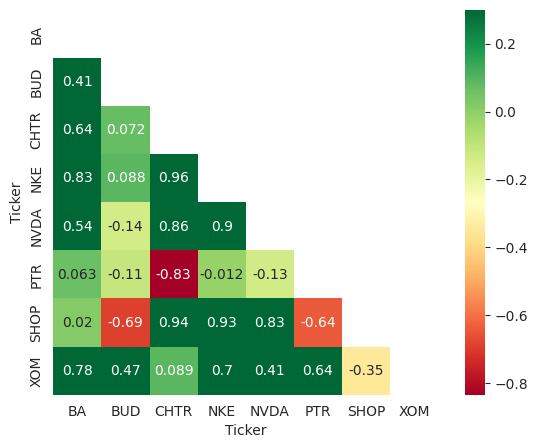

In [9]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

corr = df_pivot.corr()
print(corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, cmap='RdYlGn')


In [10]:
sample_cov = risk_models.sample_cov(df_pivot.set_index('Date'), frequency=252)
sample_cov

Ticker        BA       BUD      CHTR       NKE      NVDA       PTR      SHOP  \
Ticker                                                                         
BA      0.115713  0.046772  0.031806  0.032848  0.057852  0.043465  0.075910   
BUD     0.046772  0.071845  0.019734  0.026666  0.034722  0.031102  0.036373   
CHTR    0.031806  0.019734  0.080156  0.024171  0.037688  0.020739  0.049341   
NKE     0.032848  0.026666  0.024171  0.117521  0.052283  0.033324  0.065480   
NVDA    0.057852  0.034722  0.037688  0.052283  0.368162  0.058536  0.140786   
PTR     0.043465  0.031102  0.020739  0.033324  0.058536  0.129327  0.032096   
SHOP    0.075910  0.036373  0.049341  0.065480  0.140786  0.032096  0.384968   
XOM     0.027772  0.029834  0.018047  0.023051  0.039751  0.050099  0.020799   

Ticker       XOM  
Ticker            
BA      0.027772  
BUD     0.029834  
CHTR    0.018047  
NKE     0.023051  
NVDA    0.039751  
PTR     0.050099  
SHOP    0.020799  
XOM     0.052672

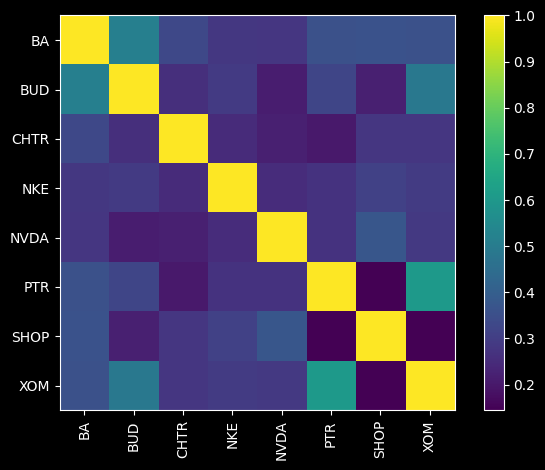

In [11]:
plotting.plot_covariance(sample_cov, plot_correlation=True);

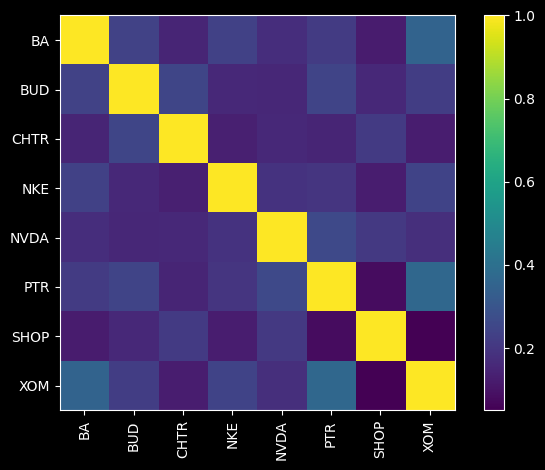

In [12]:
S = risk_models.CovarianceShrinkage(df_pivot.set_index('Date')).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True);

In [13]:
S

Ticker        BA       BUD      CHTR       NKE      NVDA       PTR      SHOP  \
Ticker                                                                         
BA      0.115378  0.010158  0.006638  0.022506  0.022414  0.015997  0.009168   
BUD     0.010158  0.016027  0.004126  0.005794  0.007554  0.006752  0.004379   
CHTR    0.006638  0.004126  0.017187  0.005052  0.007902  0.004321  0.005993   
NKE     0.022506  0.005794  0.005052  0.081009  0.020292  0.012277  0.007918   
NVDA    0.022414  0.007554  0.007902  0.020292  0.143335  0.021595  0.017137   
PTR     0.015997  0.006752  0.004321  0.012277  0.021595  0.048059  0.003857   
SHOP    0.009168  0.004379  0.005993  0.007918  0.017137  0.003857  0.047140   
XOM     0.027591  0.006476  0.003761  0.015801  0.015393  0.018439  0.002508   

Ticker       XOM  
Ticker            
BA      0.027591  
BUD     0.006476  
CHTR    0.003761  
NKE     0.015801  
NVDA    0.015393  
PTR     0.018439  
SHOP    0.002508  
XOM     0.052749

Expected returns from each stock: Ticker
BA      0.200987
BUD     0.133610
CHTR    0.124830
NKE     0.185887
NVDA    0.369142
PTR     0.199951
SHOP    0.330335
XOM     0.121142
Name: mkt, dtype: float64 

Portfolio weights for min volatility optimisation (lowest level of risk): {
    "BA": 0.0,
    "BUD": 0.383,
    "CHTR": 0.36353,
    "NKE": 0.03062,
    "NVDA": 0.0,
    "PTR": 0.06233,
    "SHOP": 0.09705,
    "XOM": 0.06348
} 

Expected annual return: 15.4%
Annual volatility: 9.5%
Sharpe Ratio: 1.49
Portfolio performance: (0.15445393525932347, 0.09525030677534178, 1.4913750944065003) 



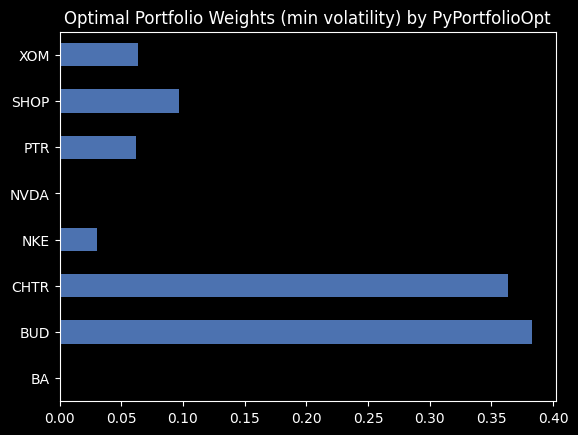

Portfolio weights for max Sharpe optimisation (highest return-per-risk): {
    "BA": 0.0085,
    "BUD": 0.23472,
    "CHTR": 0.15071,
    "NKE": 0.03644,
    "NVDA": 0.07535,
    "PTR": 0.13332,
    "SHOP": 0.36096,
    "XOM": 0.0
} 

Expected annual return: 23.2%
Annual volatility: 12.0%
Sharpe Ratio: 1.77
Portfolio performance: (0.23236678217655196, 0.12021557334303011, 1.7665496763100088) 



/home/hillenr/dev/invest/invest/lib/python3.10/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:438: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


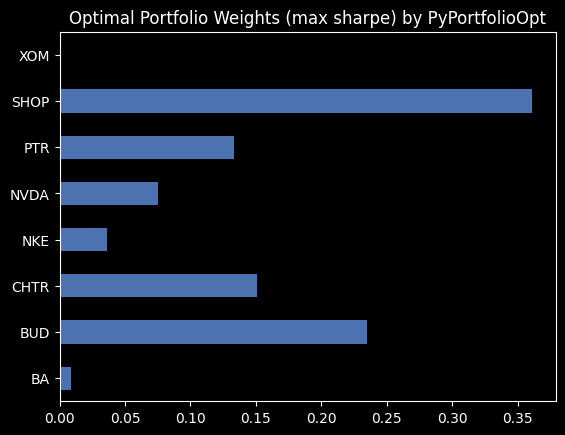

In [14]:
# json: for pretty print of a dictionary: https://stackoverflow.com/questions/44689546/how-to-print-out-a-dictionary-nicely-in-python/44689627
import json

mu = expected_returns.capm_return(df_pivot.set_index('Date'))
# Other options for the returns values: expected_returns.ema_historical_return(df_pivot.set_index('Date'))
# Other options for the returns values: expected_returns.mean_historical_return(df_pivot.set_index('Date'))
print(f'Expected returns from each stock: {mu} \n')

S = risk_models.CovarianceShrinkage(df_pivot.set_index('Date')).ledoit_wolf()

# Weights between 0 and 1 - we don't allow shorting
ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
ef.min_volatility()
weights_min_volatility = ef.clean_weights()

print(f'Portfolio weights for min volatility optimisation (lowest level of risk): {json.dumps(weights_min_volatility, indent=4, sort_keys=True)} \n')
print(f'Portfolio performance: {ef.portfolio_performance(verbose=True, risk_free_rate=0.0124)} \n')
# Risk-free rate : 10Y TBonds rate on 21-Jul-2021 https://www.cnbc.com/quotes/US10Y

pd.Series(weights_min_volatility).plot.barh(title = 'Optimal Portfolio Weights (min volatility) by PyPortfolioOpt');
plt.show()

ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
ef.max_sharpe()
weights_max_sharpe = ef.clean_weights()

print(f'Portfolio weights for max Sharpe optimisation (highest return-per-risk): {json.dumps(weights_max_sharpe, indent=4, sort_keys=True)} \n')
print(f'Portfolio performance: {ef.portfolio_performance(verbose=True, risk_free_rate=0.0124)} \n')

pd.Series(weights_max_sharpe).plot.barh(title = 'Optimal Portfolio Weights (max sharpe) by PyPortfolioOpt');
plt.show()

In [15]:
# last day prices
df_pivot.set_index('Date').iloc[-1]

Ticker
BA      133.149994
BUD      45.570000
CHTR    323.309998
NKE      87.550003
NVDA    112.269997
PTR      41.150002
SHOP     26.059999
XOM      99.190002
Name: 2022-10-14, dtype: float64

In [16]:
latest_prices = df_pivot.set_index('Date').iloc[-1]  # prices as of the day you are allocating
print(latest_prices)
da = DiscreteAllocation(weights_max_sharpe, latest_prices, total_portfolio_value = INVESTMENT, short_ratio=0.0)
alloc, leftover = da.lp_portfolio()
print(f"Discrete allocation performed with ${leftover:.2f} leftover")
alloc

Ticker
BA      133.149994
BUD      45.570000
CHTR    323.309998
NKE      87.550003
NVDA    112.269997
PTR      41.150002
SHOP     26.059999
XOM      99.190002
Name: 2022-10-14, dtype: float64
Discrete allocation performed with $171.59 leftover


/home/hillenr/dev/invest/invest/lib/python3.10/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


{'BUD': 5, 'NVDA': 1, 'PTR': 3, 'SHOP': 14}

In [17]:
for key in alloc.keys():
  print(f' stock: {key}, value = {alloc[key]*latest_prices[key]/INVESTMENT}')

 stock: BUD, value = 0.2278499984741211
 stock: NVDA, value = 0.1122699966430664
 stock: PTR, value = 0.12345000457763672
 stock: SHOP, value = 0.3648399925231934


In [18]:
from collections import OrderedDict

dict_stocks_prices =  OrderedDict(df_last_day_prices.sort_values(by='Close', ascending=False).set_index('Ticker')['Close'].to_dict())
# df_last_day_prices.sort_values(by='Close', ascending=False).set_index('Ticker')[['Close']].to_dict()
dict_stocks_prices

OrderedDict([('CHTR', 323.30999755859375),
             ('BA', 133.14999389648438),
             ('NVDA', 112.2699966430664),
             ('XOM', 99.19000244140625),
             ('NKE', 87.55000305175781),
             ('BUD', 45.56999969482422),
             ('PTR', 41.150001525878906),
             ('SHOP', 26.059999465942383)])

In [19]:
cc = 1
for key in dict_stocks_prices.keys():
  c = np.trunc(INVESTMENT/dict_stocks_prices[key])
  print(f' STOCK = {key}, LAST PRICE = {np.round(dict_stocks_prices[key])}, MAX_COUNT = {c}')
  cc = cc * c
print(cc) 

 STOCK = CHTR, LAST PRICE = 323.0, MAX_COUNT = 3.0
 STOCK = BA, LAST PRICE = 133.0, MAX_COUNT = 7.0
 STOCK = NVDA, LAST PRICE = 112.0, MAX_COUNT = 8.0
 STOCK = XOM, LAST PRICE = 99.0, MAX_COUNT = 10.0
 STOCK = NKE, LAST PRICE = 88.0, MAX_COUNT = 11.0
 STOCK = BUD, LAST PRICE = 46.0, MAX_COUNT = 21.0
 STOCK = PTR, LAST PRICE = 41.0, MAX_COUNT = 24.0
 STOCK = SHOP, LAST PRICE = 26.0, MAX_COUNT = 38.0
353928960.0


In [20]:
# https://stackoverflow.com/questions/21062781/shortest-way-to-get-first-item-of-ordereddict-in-python-3/27666721
def first(s):
    '''Return the first element from an ordered collection
       or an arbitrary element from an unordered collection.
       Raise StopIteration if the collection is empty.
    '''
    return next(iter(s))

# Get all options for one-stock investment portfolio (not nessesary spending full sum of money)
def invest_one_stock(investment, dict_stocks_prices):
  selected_stock = first(dict_stocks_prices)
  price = dict_stocks_prices.pop(selected_stock)
  max_count = np.trunc(investment / price).astype(int)
  print(f'STOCK = {selected_stock}, PRICE = {price}, MAX_TO_BUY = {max_count}')
  
  all_options = []
  print(type(max_count))
  print(list(range(0, max_count+1)) )
  
  for count in range(0, int(max_count)+1):
    result = dict({selected_stock:count})
    print(f'portfolio = {result}, remaining_to_invest = {investment-count*price}')
    all_options.append(result)
  return all_options

In [21]:
portfolios_one_stock = invest_one_stock(INVESTMENT, dict_stocks_prices.copy())
portfolios_one_stock

STOCK = CHTR, PRICE = 323.30999755859375, MAX_TO_BUY = 3
<class 'numpy.int64'>
[0, 1, 2, 3]
portfolio = {'CHTR': 0}, remaining_to_invest = 1000.0
portfolio = {'CHTR': 1}, remaining_to_invest = 676.6900024414062
portfolio = {'CHTR': 2}, remaining_to_invest = 353.3800048828125
portfolio = {'CHTR': 3}, remaining_to_invest = 30.07000732421875


[{'CHTR': 0}, {'CHTR': 1}, {'CHTR': 2}, {'CHTR': 3}]

In [22]:
def generate_all_portfolios(investment, dict_stocks_prices):
  
  # DEBUG: 
  # print(f'This call: invest_all_stocks({investment}, {dict_stocks_prices})')
  
  # if no stocks to invest ==> return zero portfolio
  if not dict_stocks_prices:
    return []

  # we have at least one stock to invest to ==> try to find min and max investment into that stock
  selected_stock = first(dict_stocks_prices)
  price = dict_stocks_prices.pop(selected_stock)
  max_count = np.trunc(investment / price).astype(int)

  # print(f'STOCK = {selected_stock}, PRICE = {price}, MAX_TO_BUY = {max_count}, INVESTMENT = {investment}')
  # print(f'   INPUT DICT LEFT AFTER THIS TRANSACTION = {dict_stocks_prices}')
  
  # if can't buy a current stock ==> try to buy a next one (which is a lower price) 
  if max_count ==0:
    return generate_all_portfolios(investment, dict_stocks_prices.copy())

  # if no other stocks left to buy ==> spend all money on the current stock and return 1 option in array: full stock investment
  if len(dict_stocks_prices.keys())==0:
    return [{selected_stock:max_count}]  
  
  all_options = []
  for count in range(0, max_count+1):
    result = dict({selected_stock:count})
    other_portfolios = generate_all_portfolios(investment - count*price, dict_stocks_prices.copy())
    for option in other_portfolios:
      result.update(option)
      all_options.append(dict(result))

  # DEBUG:
  # print(f'all options={all_options}')    
  return all_options

In [23]:
all_portfolios = generate_all_portfolios(INVESTMENT, dict_stocks_prices.copy())

In [24]:
for elem in all_portfolios[-1]:
  print(f' elem = {elem}, price = {dict_stocks_prices[elem]}')

 elem = CHTR, price = 323.30999755859375
 elem = SHOP, price = 26.059999465942383


In [25]:
import random

print(f'Found combinations of portfolios: {len(all_portfolios)}')
for ii in range(1, 6, 1):
    random_portfolio = random.choice(all_portfolios)
    random_portfolio_price = 0
    for elem in random_portfolio:
      random_portfolio_price += random_portfolio[elem] * dict_stocks_prices[elem]
    print(f'Random portfolio {ii}: {random_portfolio} with total price {np.round(random_portfolio_price,1)}')

Found combinations of portfolios: 22417
Random portfolio 1: {'CHTR': 0, 'BA': 2, 'NVDA': 2, 'XOM': 0, 'NKE': 2, 'BUD': 5, 'PTR': 0, 'SHOP': 4} with total price 998.0
Random portfolio 2: {'CHTR': 0, 'BA': 0, 'NVDA': 2, 'XOM': 0, 'NKE': 2, 'BUD': 3, 'PTR': 0, 'SHOP': 17} with total price 979.4
Random portfolio 3: {'CHTR': 0, 'BA': 3, 'NVDA': 0, 'XOM': 1, 'NKE': 0, 'BUD': 3, 'PTR': 1, 'SHOP': 12} with total price 989.2
Random portfolio 4: {'CHTR': 0, 'BA': 3, 'NVDA': 2, 'XOM': 1, 'NKE': 0, 'BUD': 4, 'PTR': 1, 'SHOP': 2} with total price 998.7
Random portfolio 5: {'CHTR': 0, 'BA': 0, 'NVDA': 1, 'XOM': 0, 'NKE': 4, 'BUD': 2, 'PTR': 4, 'SHOP': 10} with total price 978.8


In [26]:
SELECTED_PORTFOLIO = {'BA': 2, 'BUD': 1, 'NKE': 1, 'PTR': 1, 'SHOP': 0, 'XOM': 1, 'NVDA':2, 'CHTR':1 }
# SELECTED_PORTFOLIO = all_portfolios[-100]
stocks_prices["Date"] = pd.to_datetime(stocks_prices.Date)
one_day = stocks_prices[stocks_prices.Date == '2021-06-08'][['Date','Ticker','Close']].set_index('Date')
one_day['qty']= one_day.Ticker.map(SELECTED_PORTFOLIO)
one_day

Ticker       Close  qty
Date                              
2021-06-08    PTR   36.687683    1
2021-06-08    BUD   78.061554    1
2021-06-08    XOM   58.555294    1
2021-06-08     BA  252.759995    2
2021-06-08   CHTR  677.909973    1
2021-06-08   SHOP  123.073997    0
2021-06-08   NVDA  174.359467    2
2021-06-08    NKE  131.882416    1

In [27]:
portfolio_value_one_day = np.sum(one_day.Close * one_day.qty)
all_days = stocks_prices[['Date','Ticker','Close']].set_index('Date')
all_days['qty'] = all_days.Ticker.map(SELECTED_PORTFOLIO)
all_days['price'] = all_days.qty * all_days.Close
portfolio_value_daily = all_days[all_days.index>='2018-01-01'].groupby('Date')['price'].sum()
# daily_investment = pd.pivot_table(all_stocks_portfolio, values='Close', index=['Ticker'], columns=['Close'], aggfunc=np.sum)
portfolio_value_daily

Date
2018-01-02    1296.457909
2018-01-03    1310.678474
2018-01-04    1308.597702
2018-01-05    1334.971615
2018-01-08    1346.454937
                 ...     
2022-10-10    1088.889965
2022-10-11    1077.010017
2022-10-12    1071.686993
2022-10-13    1110.199989
2022-10-14    1087.609985
Name: price, Length: 1206, dtype: float64

<AxesSubplot: title={'center': "Value of a portfolio {'BA': 2, 'BUD': 1, 'NKE': 1, 'PTR': 1, 'SHOP': 0, 'XOM': 1, 'NVDA': 2, 'CHTR': 1} over time"}, xlabel='Date'>

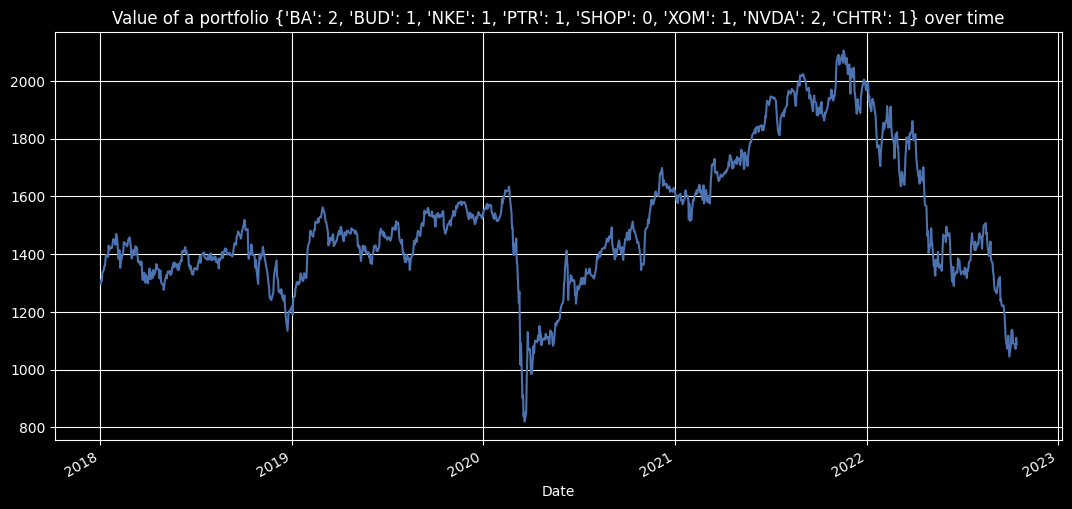

In [28]:
df_portfolio_value_daily = pd.DataFrame(portfolio_value_daily)
df_portfolio_value_daily.price.plot.line(title=f"Value of a portfolio {SELECTED_PORTFOLIO} over time", grid = True, figsize=(13,6))


In [29]:
# Generate all metrics for the portfolio
df_portfolio_value_daily['return_1d'] = df_portfolio_value_daily.price / df_portfolio_value_daily.price.shift(1)
df_portfolio_value_daily['return_3d'] = df_portfolio_value_daily.price / df_portfolio_value_daily.price.shift(3)

# 30d rolling volatility annualized: https://ycharts.com/glossary/terms/rolling_vol_30
df_portfolio_value_daily['volatility_3d'] =   df_portfolio_value_daily['return_1d'].rolling(30).std() * np.sqrt(3)
# monthly volatility
df_portfolio_value_daily['volatility_30d'] =   df_portfolio_value_daily['return_1d'].rolling(30).std() * np.sqrt(21)
# yearly volatility
df_portfolio_value_daily['volatility_365d'] =   df_portfolio_value_daily['return_1d'].rolling(30).std() * np.sqrt(251)

df_portfolio_value_daily['return_per_volatility_3d'] = (df_portfolio_value_daily['return_3d']-1) / df_portfolio_value_daily['volatility_3d']
df_portfolio_value_daily.tail()

price  return_1d  return_3d  volatility_3d  volatility_30d  \
Date                                                                           
2022-10-10  1088.889965   0.998670   0.957089       0.041498        0.109793   
2022-10-11  1077.010017   0.989090   0.951170       0.041509        0.109821   
2022-10-12  1071.686993   0.995058   0.982892       0.041310        0.109296   
2022-10-13  1110.199989   1.035937   1.019570       0.043490        0.115063   
2022-10-14  1087.609985   0.979652   1.009842       0.043390        0.114799   

            volatility_365d  return_per_volatility_3d  
Date                                                   
2022-10-10         0.379578                 -1.034051  
2022-10-11         0.379676                 -1.176380  
2022-10-12         0.377860                 -0.414125  
2022-10-13         0.397799                  0.450000  
2022-10-14         0.396887                  0.226827

<AxesSubplot: title={'center': "Volatility of a portfolio {'BA': 2, 'BUD': 1, 'NKE': 1, 'PTR': 1, 'SHOP': 0, 'XOM': 1, 'NVDA': 2, 'CHTR': 1}"}, xlabel='Date'>

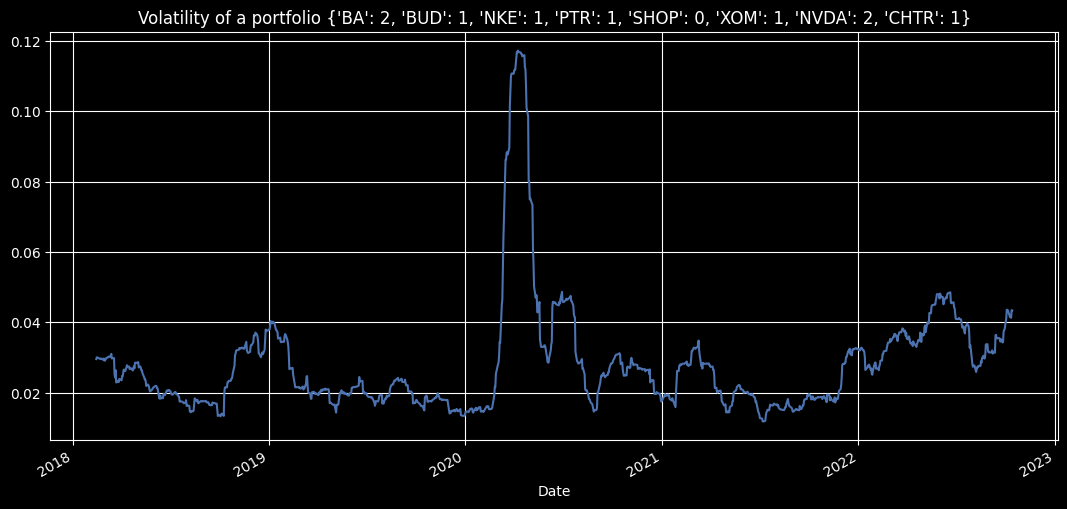

In [30]:
df_portfolio_value_daily.volatility_3d.plot.line(title= f'Volatility of a portfolio {SELECTED_PORTFOLIO}', grid = True, figsize=(13,6))

<AxesSubplot: title={'center': "Rolling return_per_volatility of a portfolio {'BA': 2, 'BUD': 1, 'NKE': 1, 'PTR': 1, 'SHOP': 0, 'XOM': 1, 'NVDA': 2, 'CHTR': 1}"}, xlabel='Date'>

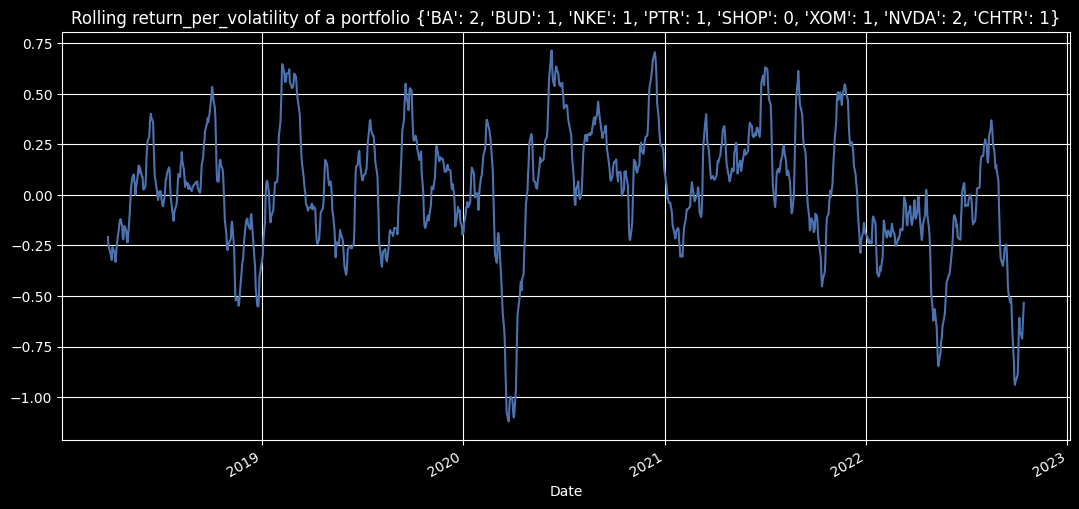

In [31]:
# Create rolling 30 days value to smooth stats for return_per_volatility
df_portfolio_value_daily['return_per_volatility_3d_rolling'] = df_portfolio_value_daily['return_per_volatility_3d'].rolling(30).mean()
df_portfolio_value_daily.return_per_volatility_3d_rolling.plot.line(title= f'Rolling return_per_volatility of a portfolio {SELECTED_PORTFOLIO}', grid = True, figsize=(13,6))

array([[<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'return_3d'}>],
       [<AxesSubplot: title={'center': 'volatility_3d'}>,
        <AxesSubplot: title={'center': 'return_per_volatility_3d'}>]],
      dtype=object)

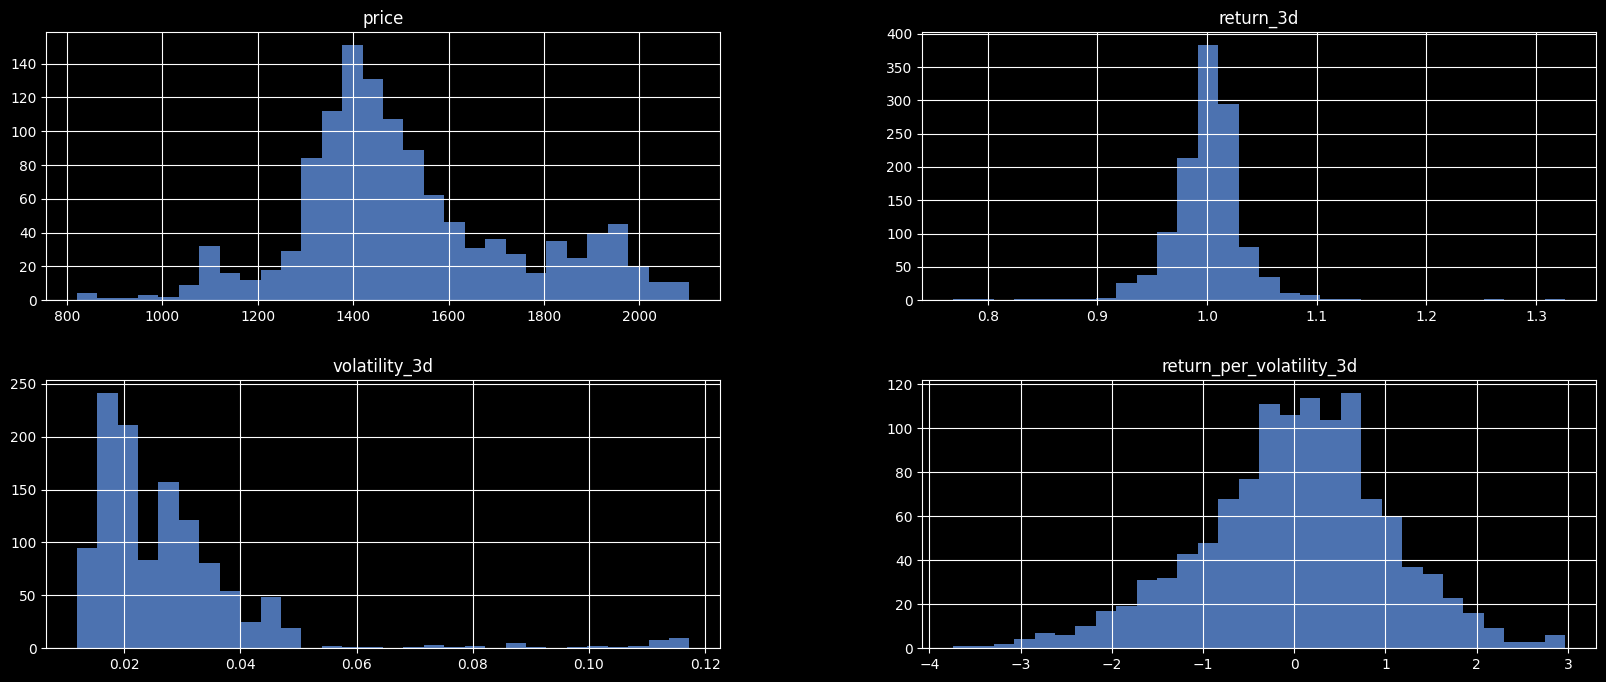

In [32]:
df_portfolio_value_daily[['price','return_3d','volatility_3d', 'return_per_volatility_3d']].hist(bins=30, figsize=(20,8))

In [33]:
# All days descriptive statistics
df_portfolio_value_daily.describe()

price    return_1d    return_3d  volatility_3d  volatility_30d  \
count  1206.000000  1205.000000  1203.000000    1176.000000     1176.000000   
mean   1511.440995     1.000031     1.000114       0.027988        0.074050   
std     232.548154     0.018722     0.033552       0.016145        0.042717   
min     820.339605     0.826137     0.768074       0.011839        0.031324   
25%    1369.188901     0.991414     0.985753       0.018289        0.048387   
50%    1462.262381     1.000603     1.002177       0.023959        0.063390   
75%    1622.765335     1.009483     1.016841       0.032342        0.085570   
max    2105.115425     1.136343     1.326732       0.117277        0.310286   

       volatility_365d  return_per_volatility_3d  \
count      1176.000000               1176.000000   
mean          0.256008                  0.012359   
std           0.147681                  1.033888   
min           0.108295                 -3.744181   
25%           0.167285                 -0.594017   
50%           0.219153                  0.079848   
75%           0.295833                  0.678462   
max           1.072727                  2.973773   

       return_per_volatility_3d_rolling  
count                       1147.000000  
mean                           0.016983  
std                            0.313681  
min                           -1.120540  
25%                           -0.169560  
50%                            0.036240  
75%                            0.217037  
max                            0.713794

In [34]:
# 10% sampling - we invent not in all days, but only in 10% of days in the last 3.5 years
df_stats = df_portfolio_value_daily.sample(frac=0.1, random_state=42).describe()
df_stats

price   return_1d   return_3d  volatility_3d  volatility_30d  \
count   121.000000  121.000000  121.000000     120.000000      120.000000   
mean   1508.851313    0.999783    1.002504       0.028211        0.074639   
std     238.780656    0.021660    0.037375       0.016747        0.044307   
min     851.751795    0.888272    0.825475       0.012771        0.033789   
25%    1370.514767    0.990857    0.987100       0.018745        0.049596   
50%    1468.983179    1.002513    1.003907       0.024158        0.063916   
75%    1649.128870    1.010264    1.024651       0.032025        0.084731   
max    2078.759624    1.056549    1.088989       0.116736        0.308853   

       volatility_365d  return_per_volatility_3d  \
count       120.000000                120.000000   
mean          0.258043                  0.142907   
std           0.153181                  1.180526   
min           0.116816                 -3.413244   
25%           0.171464                 -0.438940   
50%           0.220972                  0.162200   
75%           0.292936                  1.038449   
max           1.067774                  2.506814   

       return_per_volatility_3d_rolling  
count                        113.000000  
mean                           0.044165  
std                            0.314974  
min                           -1.112675  
25%                           -0.156859  
50%                            0.050347  
75%                            0.251849  
max                            0.639438

In [35]:
# Defined previosly: SELECTED_PORTFOLIO = {'BA': 2, 'BUD': 1, 'NKE': 1, 'PTR': 1, 'SHOP': 0, 'XOM': 1, 'NVDA':2, 'CHTR':1 }

# Get all major metrics for one portfolio:
print(f'Selected portfolio: {SELECTED_PORTFOLIO}')
print(f"Mean return in 3 days = {df_stats['return_3d']['mean']-1 :.2%}")
print(f"Volatility in 3 days = {df_stats['volatility_3d']['mean'] :.1%}")
print(f"Mean return_per_volatility in 3 days = {df_stats['return_per_volatility_3d']['mean'] :.3f}")
print(f"Median return_per_volality in 3 days = {df_stats['return_per_volatility_3d']['50%'] :.3f}")
print(f"25% drawdown in 3 days = {df_stats['return_3d']['25%']-1 :.1%}")
print(f"Max drawdown in 3 days = {df_stats['return_3d']['min']-1 :.1%}")

Selected portfolio: {'BA': 2, 'BUD': 1, 'NKE': 1, 'PTR': 1, 'SHOP': 0, 'XOM': 1, 'NVDA': 2, 'CHTR': 1}
Mean return in 3 days = 0.25%
Volatility in 3 days = 2.8%
Mean return_per_volatility in 3 days = 0.143
Median return_per_volality in 3 days = 0.162
25% drawdown in 3 days = -1.3%
Max drawdown in 3 days = -17.5%


In [36]:
# One function to get all metrics
def get_portfolio_metrics(portfolio, sample_rate, all_stock_prices):
  result = {}
  
  all_days = all_stock_prices.copy()
  # apply portfolio weigths (number of shares to buy)
  all_days['qty'] = all_days.Ticker.map(portfolio)
  all_days['price'] = all_days.qty * all_days.Close

  # get daily price of a portfolio
  portfolio_value_daily = all_days[all_days.index>='2018-01-01'].groupby('Date')['price'].sum()
  df_portfolio_value_daily = pd.DataFrame(portfolio_value_daily)

  # Generate other (daily) metrics for the portfolio
  df_portfolio_value_daily['return_1d'] = df_portfolio_value_daily.price / df_portfolio_value_daily.price.shift(1)
  df_portfolio_value_daily['return_3d'] = df_portfolio_value_daily.price / df_portfolio_value_daily.price.shift(3)

  # 30d rolling volatility annualized: https://ycharts.com/glossary/terms/rolling_vol_30
  df_portfolio_value_daily['volatility_3d'] =   df_portfolio_value_daily['return_1d'].rolling(30).std() * np.sqrt(3)
  # monthly volatility
  df_portfolio_value_daily['volatility_30d'] =   df_portfolio_value_daily['return_1d'].rolling(30).std() * np.sqrt(21)
  # yearly volatility
  df_portfolio_value_daily['volatility_365d'] =   df_portfolio_value_daily['return_1d'].rolling(30).std() * np.sqrt(251)
  
  # return per risk
  df_portfolio_value_daily['return_per_volatility_3d'] = (df_portfolio_value_daily['return_3d']-1) / df_portfolio_value_daily['volatility_3d']

  # get stats with sample rate from the params
  # we need random_state=<some number> to test all portfolios on the same sample
  df_stats = df_portfolio_value_daily.sample(frac = sample_rate, random_state=42).describe()

  result['mean_return_3d_over_one'] = df_stats['return_3d']['mean'] - 1
  result['volatility_return_3d'] = df_stats['volatility_3d']['mean']
  result['mean_return_per_vol_3d'] = df_stats['return_per_volatility_3d']['mean']
  result['median_return_per_vol_3d'] = df_stats['return_per_volatility_3d']['50%']
  result['25_percent_drawdown_3d'] = df_stats['return_3d']['25%']-1 
  result['max_drawdown_3d'] = df_stats['return_3d']['min']-1 
  
  return result

In [37]:
res = get_portfolio_metrics(portfolio = SELECTED_PORTFOLIO,
                            sample_rate = 0.1,
                            all_stock_prices = stocks_prices[stocks_prices.Date >= '2018-01-01'][['Date','Ticker','Close']].set_index('Date')
                            )

print(res)

{'mean_return_3d_over_one': 0.002504153827753708, 'volatility_return_3d': 0.028210777294630642, 'mean_return_per_vol_3d': 0.1429066837713657, 'median_return_per_vol_3d': 0.16220020633933624, '25_percent_drawdown_3d': -0.012900470289068933, 'max_drawdown_3d': -0.17452506106003596}


In [38]:
''' Get daily price for all the portfolios '''
def simulate_all_portfolios(portfolios):
  # output = pd.DataFrame()
  output = []

  for current_portfolio in portfolios:
    res = get_portfolio_metrics(portfolio = current_portfolio,
                            sample_rate = 0.1,
                            all_stock_prices = stocks_prices[stocks_prices.Date >= '2018-01-01'][['Date','Ticker','Close']].set_index('Date')
                            )
    res['portfolio'] = current_portfolio
    #output = output.append(res, ignore_index=True)
    #output = pd.concat(output, res)
    output.append(res)
  return pd.DataFrame.from_records(output)

In [39]:
simulated_result = simulate_all_portfolios(all_portfolios)

In [40]:
simulated_result.shape

(22417, 7)

In [48]:
# 1. Sort portfolios by mean_return_3d_over_one
df = simulated_result.sort_values(by='mean_return_3d_over_one', ascending=False)[["mean_return_per_vol_3d", "portfolio"]].head(5)
df.style.set_properties(subset=['portfolio'], **{'width': '500px'})

In [49]:
# Finding edge cases when (mostly) one stock is bought
max_count = {key: 0 for key in TICKERS}    
print(max_count)

{'PTR': 0, 'BUD': 0, 'XOM': 0, 'BA': 0, 'CHTR': 0, 'SHOP': 0, 'NVDA': 0, 'NKE': 0}


In [51]:
# ONE STOCK PORTFOLIO 

for i,row in simulated_result.iterrows():
  for ticker in TICKERS:
    if ticker in row['portfolio'].keys() and row['portfolio'][ticker]> max_count[ticker]:
      max_count[ticker] = row['portfolio'][ticker]

print(max_count)

{'PTR': 23, 'BUD': 21, 'XOM': 9, 'BA': 7, 'CHTR': 3, 'SHOP': 38, 'NVDA': 8, 'NKE': 11}


In [52]:
# Get all edge cases of a portfolio with 
edge_portfolios = []
for i,row in simulated_result.iterrows():
  for ticker in row['portfolio'].keys():
    if row['portfolio'][ticker] == max_count[ticker]:
      # print(row['portfolio'])
      edge_portfolios.append(row['portfolio'])

edge_portfolios[0:10]

[{'CHTR': 0,
  'BA': 0,
  'NVDA': 0,
  'XOM': 0,
  'NKE': 0,
  'BUD': 0,
  'PTR': 0,
  'SHOP': 38},
 {'CHTR': 0,
  'BA': 0,
  'NVDA': 0,
  'XOM': 0,
  'NKE': 0,
  'BUD': 0,
  'PTR': 23,
  'SHOP': 2},
 {'CHTR': 0,
  'BA': 0,
  'NVDA': 0,
  'XOM': 0,
  'NKE': 0,
  'BUD': 21,
  'PTR': 0,
  'SHOP': 1},
 {'CHTR': 0,
  'BA': 0,
  'NVDA': 0,
  'XOM': 0,
  'NKE': 11,
  'BUD': 2,
  'PTR': 1,
  'SHOP': 1},
 {'CHTR': 0,
  'BA': 0,
  'NVDA': 0,
  'XOM': 9,
  'NKE': 0,
  'BUD': 0,
  'PTR': 0,
  'SHOP': 4},
 {'CHTR': 0,
  'BA': 0,
  'NVDA': 0,
  'XOM': 9,
  'NKE': 0,
  'BUD': 0,
  'PTR': 1,
  'SHOP': 2},
 {'CHTR': 0,
  'BA': 0,
  'NVDA': 0,
  'XOM': 9,
  'NKE': 0,
  'BUD': 1,
  'PTR': 0,
  'SHOP': 2},
 {'CHTR': 0,
  'BA': 0,
  'NVDA': 8,
  'XOM': 0,
  'NKE': 0,
  'BUD': 0,
  'PTR': 0,
  'SHOP': 3},
 {'CHTR': 0,
  'BA': 0,
  'NVDA': 8,
  'XOM': 0,
  'NKE': 0,
  'BUD': 0,
  'PTR': 1,
  'SHOP': 2},
 {'CHTR': 0,
  'BA': 0,
  'NVDA': 8,
  'XOM': 0,
  'NKE': 0,
  'BUD': 1,
  'PTR': 0,
  'SHOP': 2}]

In [53]:
top_portfolios = edge_portfolios.copy()

top_portfolios.append(simulated_result.sort_values(by='mean_return_3d_over_one', ascending=False).head(1)['portfolio'].values[0])
top_portfolios.append(simulated_result.sort_values(by='median_return_per_vol_3d', ascending=False).head(1)['portfolio'].values[0])


In [54]:
top_portfolios[0:10]

[{'CHTR': 0,
  'BA': 0,
  'NVDA': 0,
  'XOM': 0,
  'NKE': 0,
  'BUD': 0,
  'PTR': 0,
  'SHOP': 38},
 {'CHTR': 0,
  'BA': 0,
  'NVDA': 0,
  'XOM': 0,
  'NKE': 0,
  'BUD': 0,
  'PTR': 23,
  'SHOP': 2},
 {'CHTR': 0,
  'BA': 0,
  'NVDA': 0,
  'XOM': 0,
  'NKE': 0,
  'BUD': 21,
  'PTR': 0,
  'SHOP': 1},
 {'CHTR': 0,
  'BA': 0,
  'NVDA': 0,
  'XOM': 0,
  'NKE': 11,
  'BUD': 2,
  'PTR': 1,
  'SHOP': 1},
 {'CHTR': 0,
  'BA': 0,
  'NVDA': 0,
  'XOM': 9,
  'NKE': 0,
  'BUD': 0,
  'PTR': 0,
  'SHOP': 4},
 {'CHTR': 0,
  'BA': 0,
  'NVDA': 0,
  'XOM': 9,
  'NKE': 0,
  'BUD': 0,
  'PTR': 1,
  'SHOP': 2},
 {'CHTR': 0,
  'BA': 0,
  'NVDA': 0,
  'XOM': 9,
  'NKE': 0,
  'BUD': 1,
  'PTR': 0,
  'SHOP': 2},
 {'CHTR': 0,
  'BA': 0,
  'NVDA': 8,
  'XOM': 0,
  'NKE': 0,
  'BUD': 0,
  'PTR': 0,
  'SHOP': 3},
 {'CHTR': 0,
  'BA': 0,
  'NVDA': 8,
  'XOM': 0,
  'NKE': 0,
  'BUD': 0,
  'PTR': 1,
  'SHOP': 2},
 {'CHTR': 0,
  'BA': 0,
  'NVDA': 8,
  'XOM': 0,
  'NKE': 0,
  'BUD': 1,
  'PTR': 0,
  'SHOP': 2}]

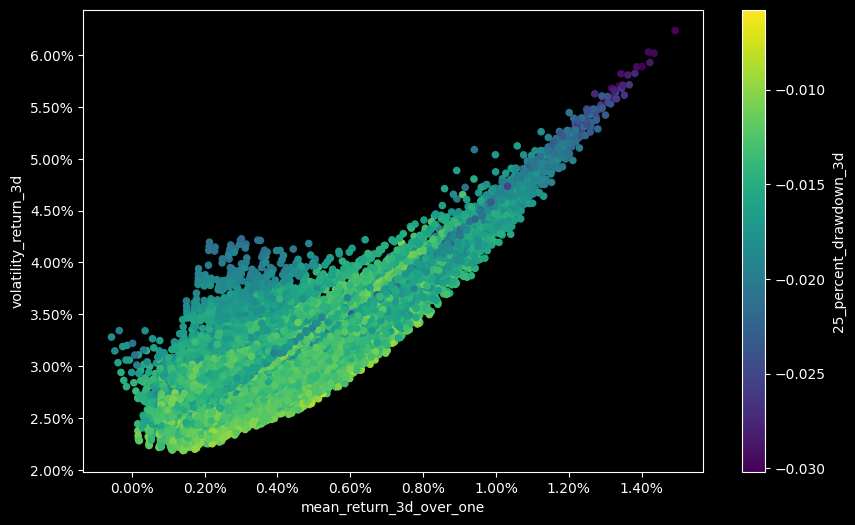

In [55]:
# https://stackoverflow.com/questions/31357611/format-y-axis-as-percent
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax = simulated_result.plot.scatter(x = 'mean_return_3d_over_one', 
                                   y = 'volatility_return_3d', 
                                   c = '25_percent_drawdown_3d', 
                                   colormap='RdYlGn', 
                                   ax=ax,
                                   figsize=(10,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))